In [334]:
import json
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
import nltk
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
# Import csv data
df_us = pd.read_csv("../data/USvideos.csv")
df_ca = pd.read_csv("../data/CAvideos.csv")
df_gb = pd.read_csv("../data/GBvideos.csv")

In [6]:
# Extract the category ids used in csv files from json files
def extract_cat_id(file_path):
    # Load json file
    with open(file_path) as js:
        d = json.load(js)
    # Normalize nested dict, and drop irrelevant cols
    df = json_normalize(d['items'])
    df_items = df.drop(columns=['kind', 'etag', 'snippet.channelId', 'snippet.assignable'])
    return df_items

In [7]:
us_cats = extract_cat_id('../data/US_category_id.json')
ca_cats = extract_cat_id('../data/CA_category_id.json')
gb_cats = extract_cat_id('../data/GB_category_id.json')
us_cats.head()

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [8]:
# Create dictionary for cat number to name
def generate_cat_dict(country_cats):
    cat_id_list = country_cats["id"]
    cat_name_list = country_cats["snippet.title"]
    cat_dict = {cat_id_list[i]: cat_name_list[i] for i in range(len(cat_id_list))}
    return cat_dict

In [9]:
us_cat_dict = generate_cat_dict(us_cats)
ca_cat_dict = generate_cat_dict(us_cats)
gb_cat_dict = generate_cat_dict(us_cats)
us_cat_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [11]:
# Print the total number of trending categories for specified country
def cat_count(df, country_name):
    print(country_name + ": " + str(len(df)) + " trending categories")

In [12]:
cat_count(us_cats, "United States")

United States: 32 trending categories


In [13]:
cat_count(ca_cats, "Canada")

Canada: 31 trending categories


In [14]:
cat_count(gb_cats, "Great Britain")

Great Britain: 31 trending categories


### Insight: All three countries have about the same number of total trending categories, with the US having one more than Canada and Great Britain.

In [15]:
# Generate which categories are trending in one country but not the other; indicate trending country
def trending_cat_diff(df_country1, df_country2):
    diff = df_country1.merge(df_country2, how='outer', indicator=True).loc[lambda x : x['_merge'] != 'both']
    return diff

In [16]:
trending_cat_diff(us_cats, gb_cats)

,id,snippet.title,_merge
16,29,Nonprofits & Activism,left_only


In [17]:
# Check previous diff func
def trending_cat_diff2(df_country1, df_country2):
    diff = pd.concat([df_country1,df_country2]).drop_duplicates(keep=False)
    return diff

In [18]:
trending_cat_diff2(us_cats, gb_cats)

,id,snippet.title
16,29,Nonprofits & Activism


In [19]:
trending_cat_diff(us_cats, ca_cats)

,id,snippet.title,_merge
16,29,Nonprofits & Activism,left_only


In [20]:
trending_cat_diff(gb_cats, ca_cats)

,id,snippet.title,_merge


### Insight: Nonprofits & Activism is a trending category in the US but not Canada and Great Britain. Futher, Candada and Great Britain have the same trending categories.

In [21]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [22]:
# Create cat_name feature using cat_dict
def generate_cat_name_feature(df, country_cat_dict):
    cat_id_str = df["category_id"].apply(lambda x: str(x))
    df["category_name"] = cat_id_str.map(country_cat_dict)
    return df

In [105]:
generate_cat_name_feature(df_us, us_cat_dict)
generate_cat_name_feature(df_ca, ca_cat_dict)
generate_cat_name_feature(df_gb, gb_cat_dict)
generate_cat_name_feature(df_us, us_cat_dict).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_engagement,like_dislike_engagement,trending_date_formatted,trending_month_year,publish_date,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2.13,8.08,2017-11-14,2017-11,2017-11-13,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",0.53,4.27,2017-11-14,2017-11,2017-11-13,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.26,4.74,2017-11-14,2017-11,2017-11-12,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,0.63,3.16,2017-11-14,2017-11,2017-11-13,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,0.84,6.40,2017-11-14,2017-11,2017-11-12,Entertainment


In [24]:
# Function to create engagement columns in given df
def create_engagement_features(df):
    df["comment_engagement"] = round(((df["comment_count"] / df["views"]) * 100), 2)
    df["like_dislike_engagement"] = round((((df["likes"] + df["dislikes"]) / df["views"]) * 100), 2)
    return df_us

In [106]:
create_engagement_features(df_us)
create_engagement_features(df_ca)
create_engagement_features(df_gb)
create_engagement_features(df_us).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_engagement,like_dislike_engagement,trending_date_formatted,trending_month_year,publish_date,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2.13,8.08,2017-11-14,2017-11,2017-11-13,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",0.53,4.27,2017-11-14,2017-11,2017-11-13,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.26,4.74,2017-11-14,2017-11,2017-11-12,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,0.63,3.16,2017-11-14,2017-11,2017-11-13,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,0.84,6.40,2017-11-14,2017-11,2017-11-12,Entertainment


In [26]:
# Calculate percent of trending videos with like/dislike engagement above a given threshold
def calc_like_dislike_engagement(df, threshold):
    like_dislike_engagement = df["like_dislike_engagement"].index[df["like_dislike_engagement"] > threshold]
    engagement_count = len(like_dislike_engagement)
    engagement_percentage = (engagement_count / len(df)) * 100
    return engagement_count, engagement_percentage

In [27]:
calc_like_dislike_engagement(df_us, 10)

(1218, 2.9744316100515276)

In [28]:
# Calculate percent of trending videos with comment engagement above a given threshold
def calc_comment_engagement(df, threshold):
    comment_engagement = df["comment_engagement"].index[df["comment_engagement"] > threshold]
    engagement_count = len(comment_engagement)
    engagement_percentage = (engagement_count / len(df)) * 100
    return engagement_count, engagement_percentage

In [29]:
calc_comment_engagement(df_us, 2)

(835, 2.039121834477032)

### Insight: Only 2.9 % of trending videos have a like/dislike engagement (percentage of viewers who liked or disliked the video) over 10%. And only 2% of trending videos have a comment engagement (percentage of viewers who commented on the video) over 2%. So the claim that trending videos are based on more than just view count is interesting.

In [30]:
# Calculate comment engagement by category for given country
def calc_comment_engagement_cats(df):
    comment_engagement_by_cat = df.pivot_table('comment_engagement', index='category_name', aggfunc='mean')
    comment_engagement_by_cat = comment_engagement_by_cat.sort_values(by='comment_engagement', ascending=False)
    return comment_engagement_by_cat

In [31]:
us_comment_engagement_by_cat = calc_comment_engagement_cats(df_us)
ca_comment_engagement_by_cat = calc_comment_engagement_cats(df_ca)
gb_comment_engagement_by_cat = calc_comment_engagement_cats(df_gb)
us_comment_engagement_by_cat

,comment_engagement
category_name,
Gaming,0.746059
Nonprofits & Activism,0.730702
News & Politics,0.641705
Howto & Style,0.589016
Comedy,0.521869
People & Blogs,0.481903
Education,0.450628
Science & Technology,0.413499
Pets & Animals,0.401511


In [32]:
# Calculate like/dislike engagement by category for given country
def cal_like_dislike_engagement(df):
    like_dislike_engagement_by_cat = df.pivot_table('like_dislike_engagement', index='category_name', aggfunc='mean')
    like_dislike_engagement_by_cat = like_dislike_engagement_by_cat.sort_values(by='like_dislike_engagement', ascending=False)
    return like_dislike_engagement_by_cat

In [33]:
us_like_dislike_engagement_by_cat = cal_like_dislike_engagement(df_us)
ca_like_dislike_engagement_by_cat = cal_like_dislike_engagement(df_ca)
gb_like_dislike_engagement_by_cat = cal_like_dislike_engagement(df_gb)
us_like_dislike_engagement_by_cat

,like_dislike_engagement
category_name,
Music,4.882565
Howto & Style,4.632870
Comedy,4.541163
People & Blogs,4.385785
Nonprofits & Activism,4.187368
Gaming,3.983892
Education,3.904336
Pets & Animals,3.422533
Science & Technology,3.200212


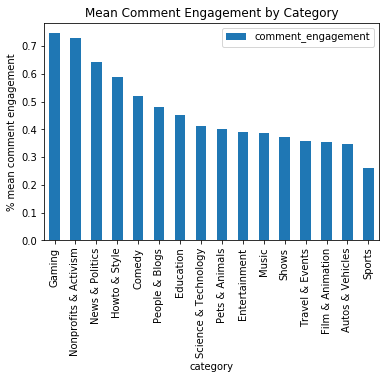

In [34]:
us_comment_engagement_by_cat.plot.bar()
plt.title("Mean Comment Engagement by Category")
plt.ylabel('% mean comment engagement')
plt.xlabel('category');

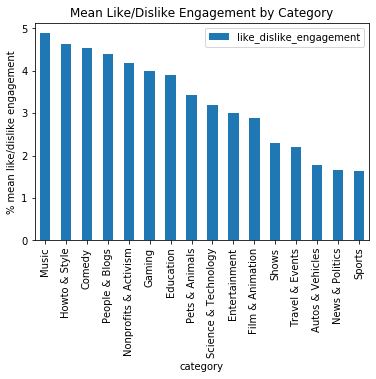

In [35]:
us_like_dislike_engagement_by_cat.plot.bar()
plt.title("Mean Like/Dislike Engagement by Category")
plt.ylabel('% mean like/dislike engagement')
plt.xlabel('category');

In [98]:
# Create converted_trending_date feature to given df as well as month/year feature
def create_formatted_trending_date(df):
    col = df["trending_date"].apply(lambda x: "20" + x)
    df["trending_date_formatted"] = pd.to_datetime(col, format="%Y.%d.%m")
    trend_date = df["trending_date_formatted"]
    df["trending_month_year"] = pd.to_datetime(trend_date).dt.to_period('M')

In [99]:
create_formatted_trending_date(df_us)
create_formatted_trending_date(df_ca)
create_formatted_trending_date(df_gb)
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_engagement,like_dislike_engagement,trending_date_formatted,trending_month_year
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2.13,8.08,2017-11-14,2017-11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.53,4.27,2017-11-14,2017-11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.26,4.74,2017-11-14,2017-11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.63,3.16,2017-11-14,2017-11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.84,6.40,2017-11-14,2017-11


In [101]:
# Create publish_dates feature from publish_time feature
def create_publish_dates(df):
    df["publish_date"] = df["publish_time"].apply(lambda x: x[:10])
    pd.to_datetime(df["publish_date"], format="%Y-%m-%d")

In [102]:
create_publish_dates(df_us)
create_publish_dates(df_ca)
create_publish_dates(df_gb)
df_ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_engagement,like_dislike_engagement,trending_date_formatted,trending_month_year,publish_date
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,0.73,4.84,2017-11-14,2017-11,2017-11-10
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1.28,12.76,2017-11-14,2017-11,2017-11-13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.26,4.74,2017-11-14,2017-11,2017-11-12
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.84,6.40,2017-11-14,2017-11,2017-11-12
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,0.25,4.94,2017-11-14,2017-11,2017-11-09


In [119]:
ca_cat_trend_count = sum_cat_trend(df_ca)
gb_cat_trend_count = sum_cat_trend(df_gb)
us_cat_trend_count = sum_cat_trend(df_us)
us_cat_trend_count

,trending_date_formatted
category_name,
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174


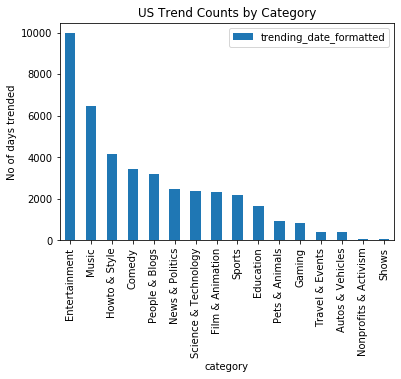

In [120]:
us_cat_trend_count.plot.bar()
plt.title("US Trend Counts by Category")
plt.ylabel('No of days trended')
plt.xlabel('category');

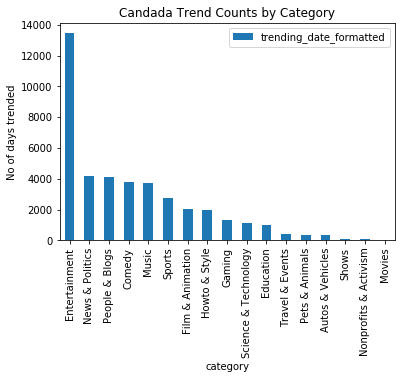

In [121]:
ca_cat_trend_count.plot.bar()
plt.title("Candada Trend Counts by Category")
plt.ylabel('No of days trended')
plt.xlabel('category');

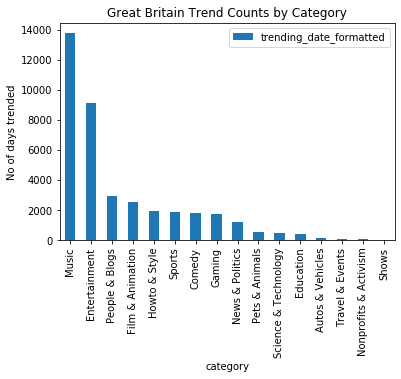

In [193]:
gb_cat_trend_count.plot.bar()
plt.title("Great Britain Trend Counts by Category")
plt.ylabel('No of days trended')
plt.xlabel('category');

### Insight: The more popular categories for each country.

In [262]:
df_cat_trend = df_us.loc[df_us["category_name"] == us_cats["snippet.title"][2], ["trending_month_year", "category_name"]]
df_cat_trend

,trending_month_year,category_name
12,2017-11,Music
32,2017-11,Music
37,2017-11,Music
39,2017-11,Music
40,2017-11,Music
...,...,...
40935,2018-06,Music
40938,2018-06,Music
40939,2018-06,Music
40941,2018-06,Music


In [263]:
table = df_cat_trend.pivot_table('category_name', index='trending_month_year', aggfunc='count')
table

,category_name
trending_month_year,
2017-11,613
2017-12,950
2018-01,758
2018-02,777
2018-03,810
2018-04,747
2018-05,1121
2018-06,696


In [278]:
for i in range(len(us_cats)):
    print(df_us.loc[df_us["category_name"] == us_cats["snippet.title"][i], ["trending_month_year", "category_name"]])

      trending_month_year     category_name
8                 2017-11  Film & Animation
29                2017-11  Film & Animation
36                2017-11  Film & Animation
71                2017-11  Film & Animation
86                2017-11  Film & Animation
...                   ...               ...
40868             2018-06  Film & Animation
40886             2018-06  Film & Animation
40893             2018-06  Film & Animation
40937             2018-06  Film & Animation
40947             2018-06  Film & Animation

[2345 rows x 2 columns]
      trending_month_year     category_name
30                2017-11  Autos & Vehicles
58                2017-11  Autos & Vehicles
163               2017-11  Autos & Vehicles
197               2017-11  Autos & Vehicles
265               2017-11  Autos & Vehicles
...                   ...               ...
35240             2018-05  Autos & Vehicles
35450             2018-05  Autos & Vehicles
35654             2018-05  Autos & Vehicles
35857  

# !!!!!HELP: Why is it generating an additional, incorrect plot when I assign name this way?

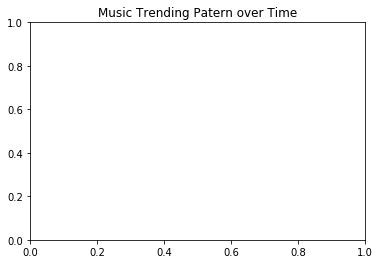

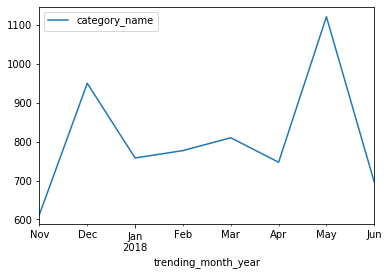

In [264]:
nm = us_cats["snippet.title"][2]
plt.title(nm + " Trending Patern over Time")
table.plot();

# !!!!!HELP: First and last plot (maybe just first)

In [281]:
# Print viz of each categories' trending pattern over time
def cat_trend(df, country_cats):
    for i in range(len(country_cats)):
        cat_nm = country_cats["snippet.title"][i]
        df_cat_trend_i = df.loc[df["category_name"] == country_cats["snippet.title"][i], ["trending_month_year", "category_name"]]
        table_i = df_cat_trend_i.pivot_table("category_name", index="trending_month_year", aggfunc="count")
        if (len(table_i) == 0):
            continue
        plt.title(cat_nm + " Trending Patern over Time")
        table_i.plot()

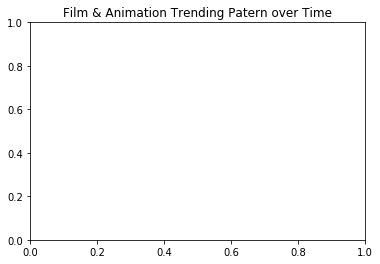

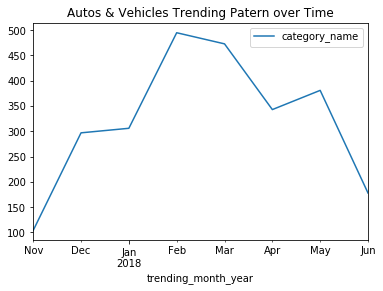

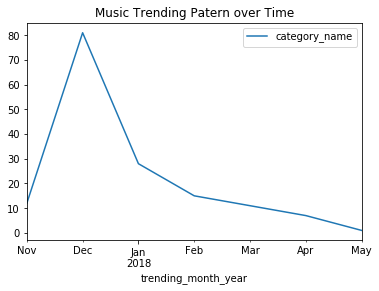

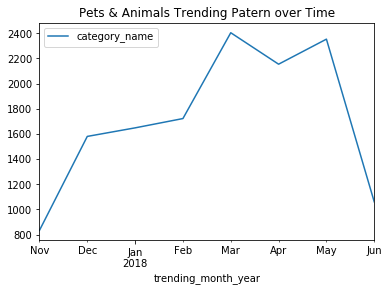

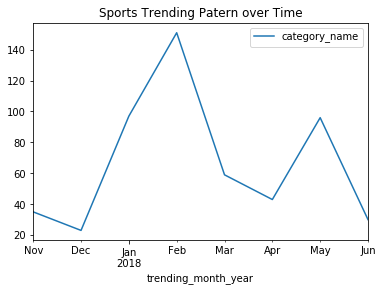

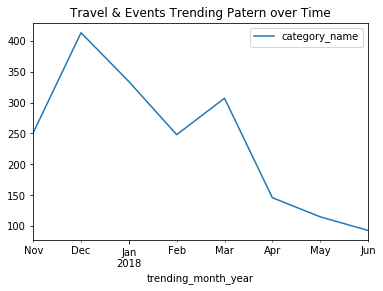

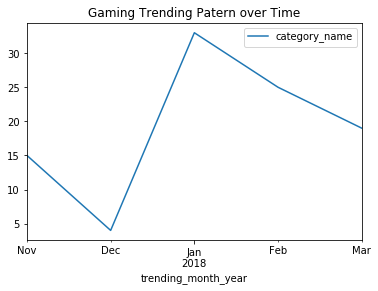

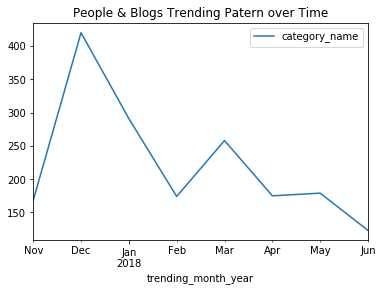

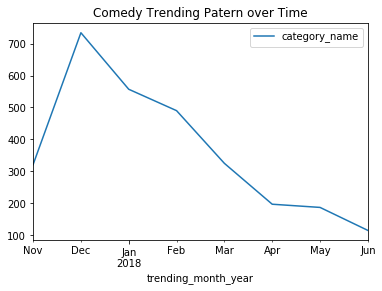

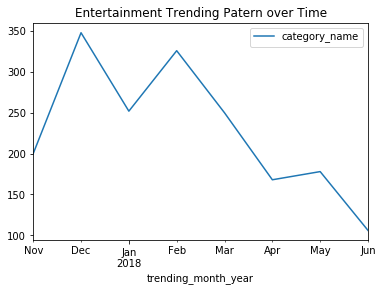

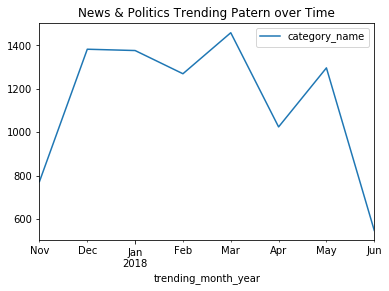

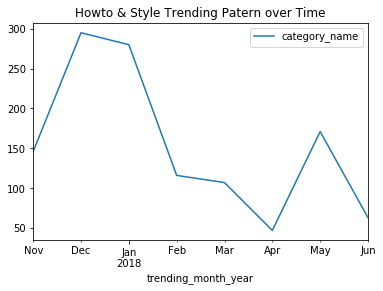

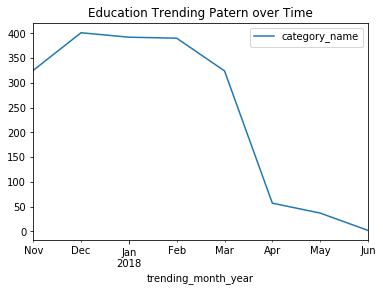

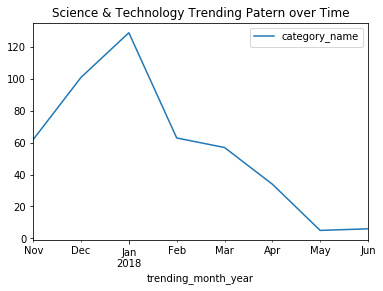

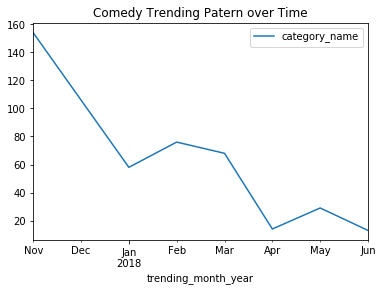

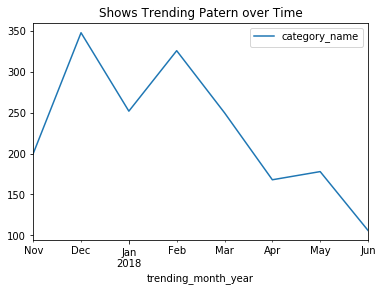

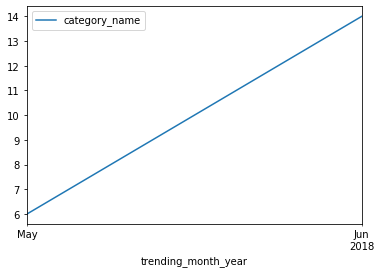

In [282]:
cat_trend(df_gb, gb_cats)

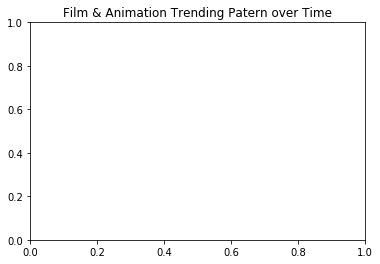

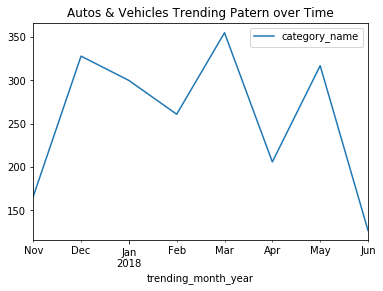

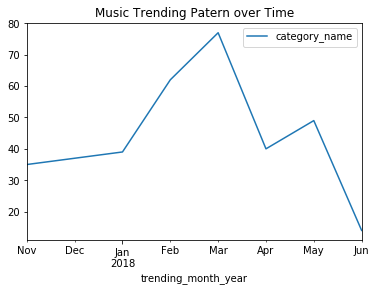

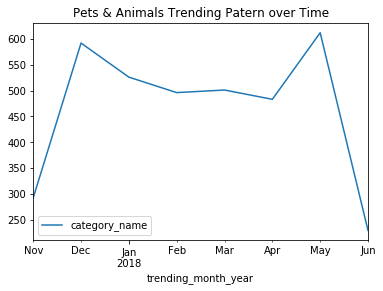

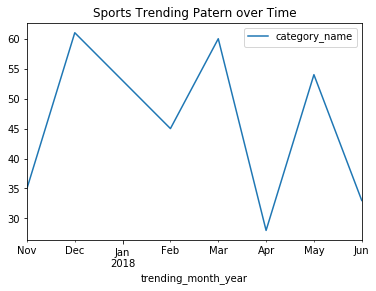

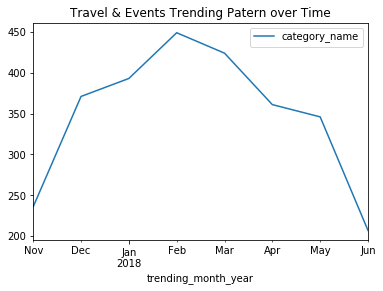

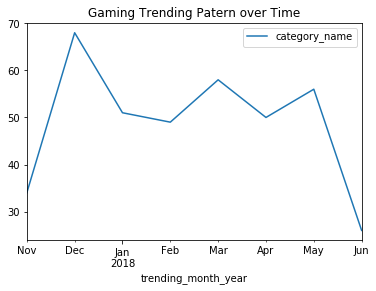

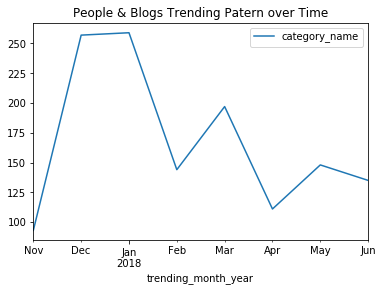

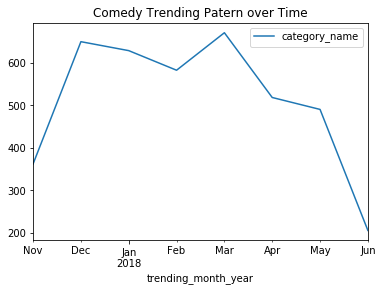

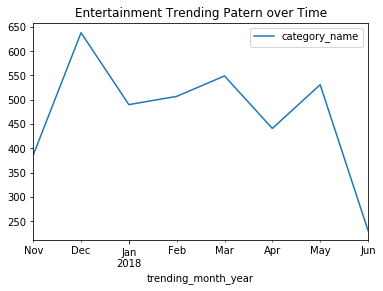

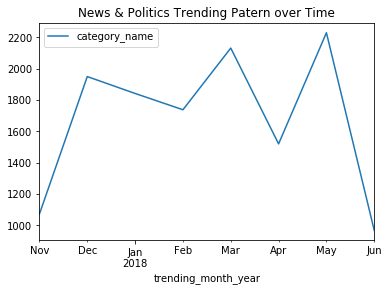

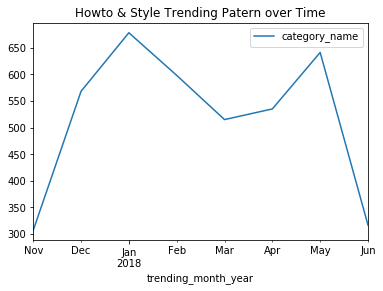

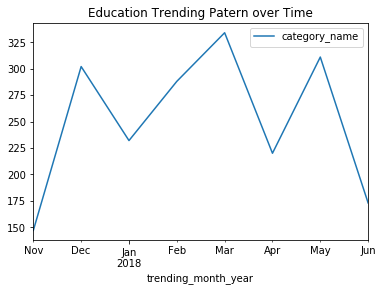

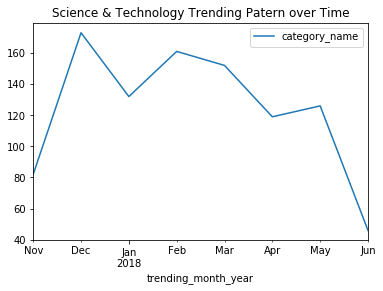

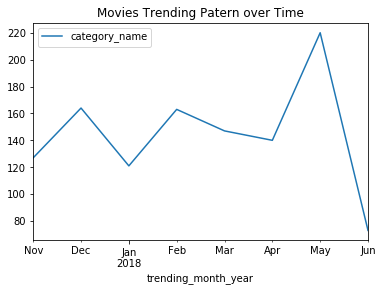

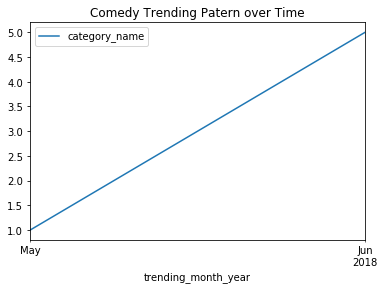

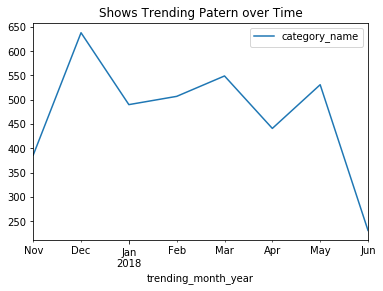

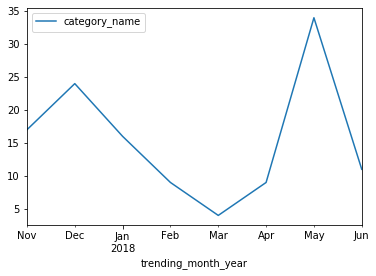

In [283]:
cat_trend(df_ca, ca_cats)

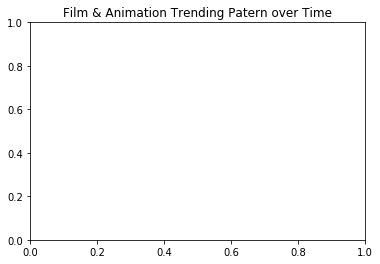

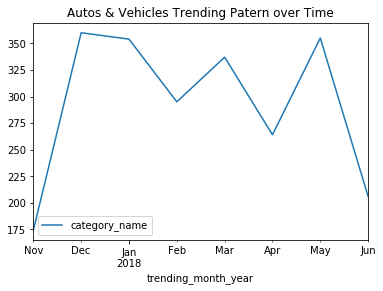

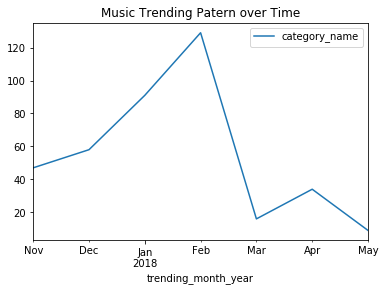

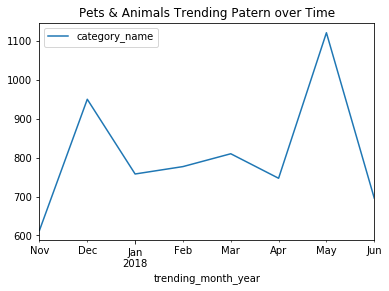

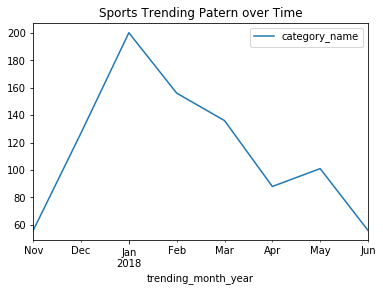

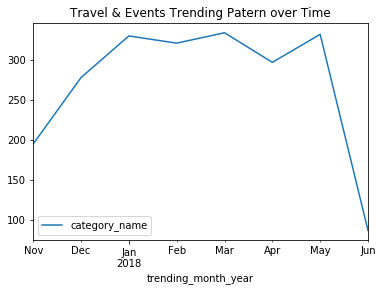

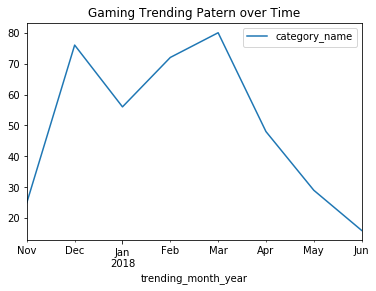

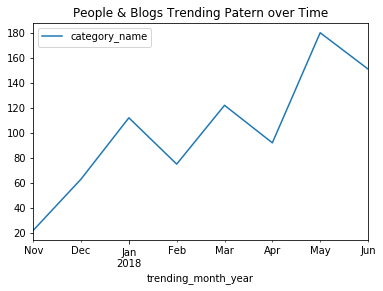

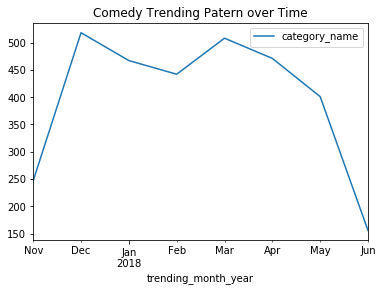

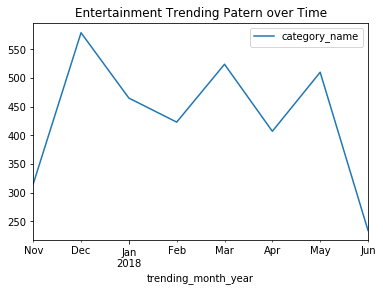

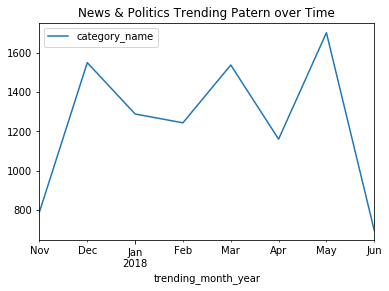

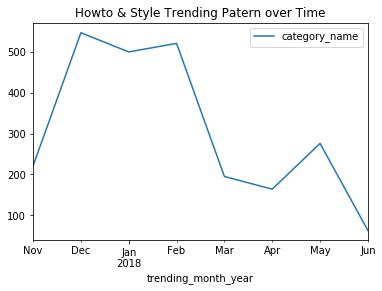

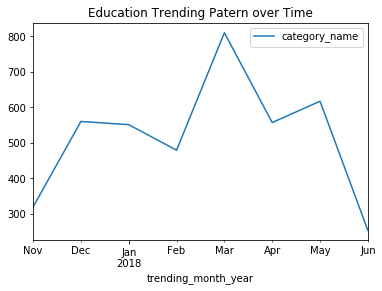

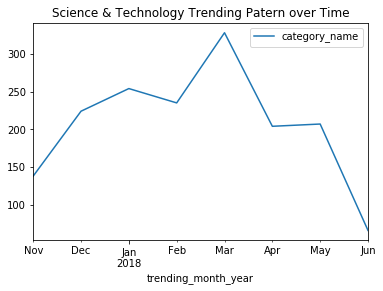

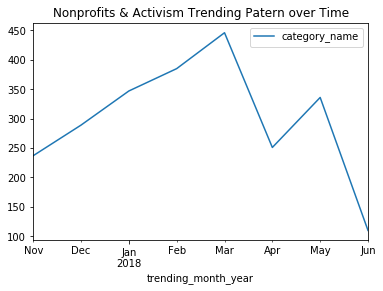

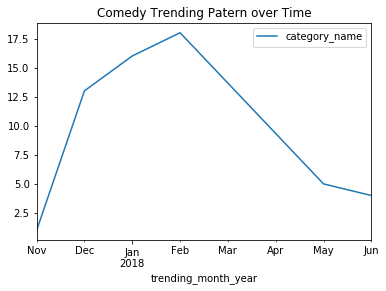

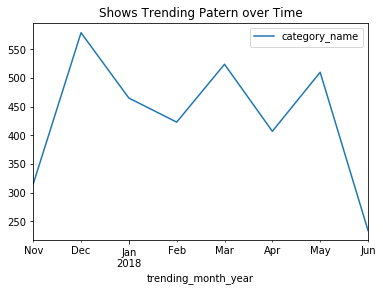

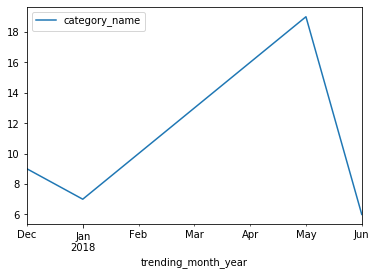

In [284]:
cat_trend(df_us, us_cats)

In [285]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_engagement,like_dislike_engagement,trending_date_formatted,trending_month_year,publish_date,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2.13,8.08,2017-11-14,2017-11,2017-11-13,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",0.53,4.27,2017-11-14,2017-11,2017-11-13,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.26,4.74,2017-11-14,2017-11,2017-11-12,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,0.63,3.16,2017-11-14,2017-11,2017-11-13,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,0.84,6.40,2017-11-14,2017-11,2017-11-12,Entertainment


In [309]:
cv = CountVectorizer(lowercase=True, stop_words="english", binary=True)
count_vector = cv.fit_transform(df_us["title"])
count_vector

<40949x10055 sparse matrix of type '<class 'numpy.int64'>'
	with 235003 stored elements in Compressed Sparse Row format>

In [310]:
pd.DataFrame(count_vector)

,0
0,"(0, 9593)\t1\n (0, 8817)\t1\n (0, 5580)\t1"
1,"(0, 9237)\t1\n (0, 6989)\t1\n (0, 9663)\t1..."
2,"(0, 7195)\t1\n (0, 8703)\t1\n (0, 7676)\t1..."
3,"(0, 6215)\t1\n (0, 5445)\t1\n (0, 7290)\t1..."
4,"(0, 2364)\t1\n (0, 3829)\t1\n (0, 853)\t1"
...,...
40944,"(0, 1608)\t1\n (0, 5110)\t1\n (0, 1622)\t1"
40945,"(0, 3239)\t1\n (0, 9236)\t1\n (0, 587)\t1\..."
40946,"(0, 6698)\t1\n (0, 5500)\t1\n (0, 4009)\t1..."
40947,"(0, 1103)\t1\n (0, 3041)\t1\n (0, 6552)\t1"


In [324]:
tokens = nltk.word_tokenize(df_us["title"][1].lower().strip())
tokens

['the',
 'trump',
 'presidency',
 ':',
 'last',
 'week',
 'tonight',
 'with',
 'john',
 'oliver',
 '(',
 'hbo',
 ')']

In [308]:
frequent_itemsets = apriori(dense_v, min_support=0.02, use_colnames=True)
frequent_itemsets

AttributeError: 'matrix' object has no attribute 'dtypes'

In [335]:
import geopandas
import geoplot

OSError: Could not find lib c or load any of its variants [].